### Исследовательский анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В таблице 4000 наблюдений по четырнадцати признакам. Все признаки выражены в числовом формате, пропущенных значений нет. Данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 
Набор данных включает данные на месяц до оттока и факт оттока на определённый месяц и следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:
- **gender** — пол;
- **Near_Location** — проживание или работа в районе, где находится фитнес-центр;
- **Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- **Phone** — наличие контактного телефона;
- **Age** — возраст;
- **Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- **Contract_period** — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- **Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах);
- **Group_visits** — факт посещения групповых занятий;
- **Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента;
- **Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц;
- **Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- **Churn** — факт оттока в текущем месяце.

In [5]:
df.columns = df.columns.str.lower() #приведем названия колонок к нижнему регистру

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В исследуемых наблюдениях среди клиентов примерно одинаковое количество мужчин и женщин. Большая часть посетителей проживает или работает в том же районе, где находится фитнес-центр. Акцией "приведи друга" воспользовались 31% посетителей. В среднем клиенты посещают центр не чаще двух раз в неделю, редко покупают годовой абонемент, в половине случаев являются сотрудниками компаний-партнеров. Средний возраст клиента - 29 лет. 26,5% исследуемых клиентов ушли в отток.

В виду значительной разницы в стандартных отклонений значений исследуемых признаков клиентов, перед обучением моделей необходимо выполнить стандартизацию.

In [7]:
df.groupby('churn').agg('mean') #средние значения признаков клиентов, продолжающих посещение и завершивших

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


На основе средних показателей признаков можно сделать выводы, что:
- клиенты ушедшие в отток:
 -  в основном преобретали абонемент сроком на 1 месяц
 -  прекращают посещение в первый месяц действия абонемента
 -  в 35% случаев являются сотрудниками компании-партнера клуба
 -  в 18% случаев участвовали в акции "приведи друга"
 
- клиенты продолжающие посещение:
 -  средний абонемент - 6 мес.
 -  посещают центр в среднем два раза в неделю
 -  более чем в половине случаев являются сотрудниками компании-партнера клуба
 -  в 35% случаев участвовали в акции "приведи друга"

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

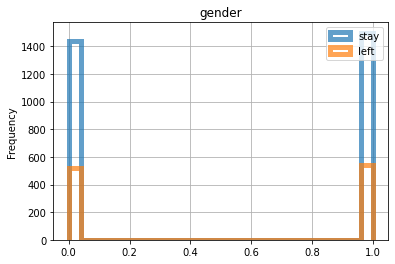

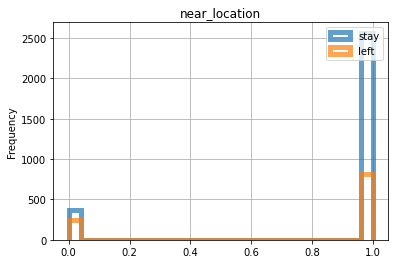

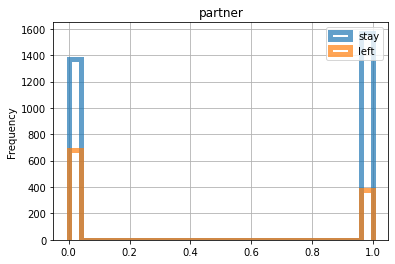

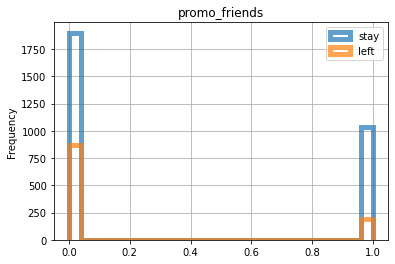

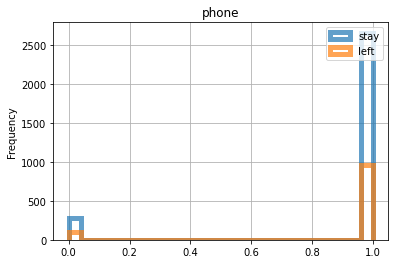

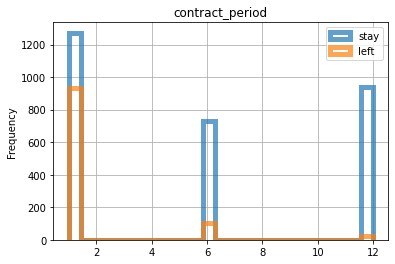

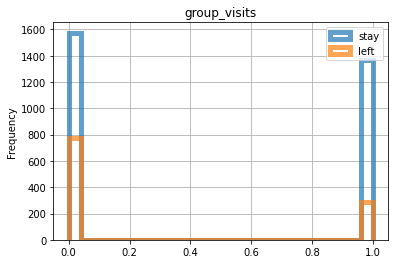

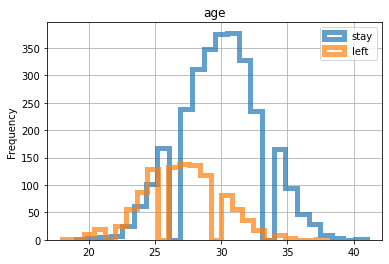

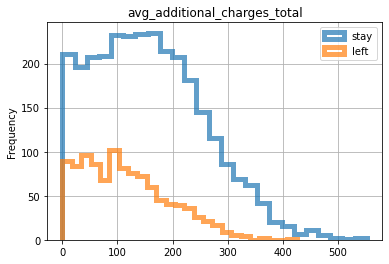

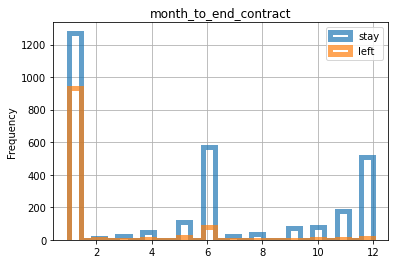

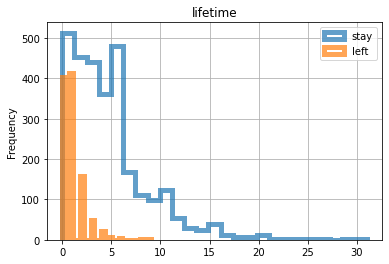

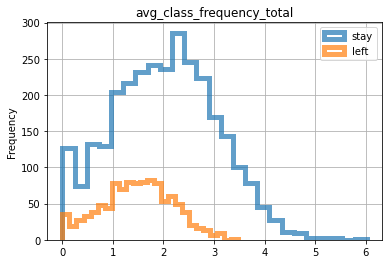

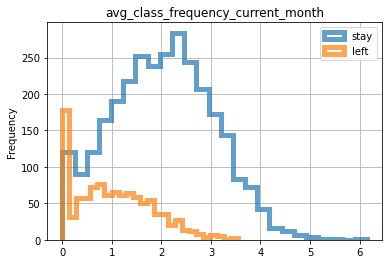

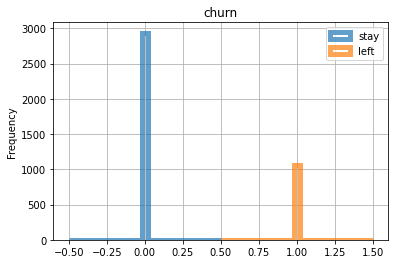

In [8]:
stay = df.query('churn == 0')
left = df.query('churn == 1')

for column in stay:
    ax=stay.plot(kind='hist',
                         y=column, 
                           histtype='step',
                          bins=25,linewidth=5,
                          alpha=0.7,
                          label='stay',
                          )
    left.plot(kind='hist',
                    y=column, 
                    title=column,
                    histtype='step',
                    bins=25,
                    linewidth=5,
                    alpha=0.7,
                    label='left',
                    ax=ax,
                    grid=True,
                    legend=True,
                   )
    plt.show()

- чаще прекращают посещение клиенты, не являющиеся сотрудниками компаний-партнеров
- участие в акции "приведи друга" не удерживает клиентов
- большая часть посетителей, прекративших посещение покупали абонемет сроком на 1 месяц, а те, что купили абонементы на 6 и 12 месяцев, прекращали посещение в основном в первые два месяца
- регулярно посещают центра клиенты в возрасте 27-33, а прекращают посещение чаще клиенты до 30 лет
- среди клиентов оттока чаще встречаются те, кто не посещал групповые тренировки

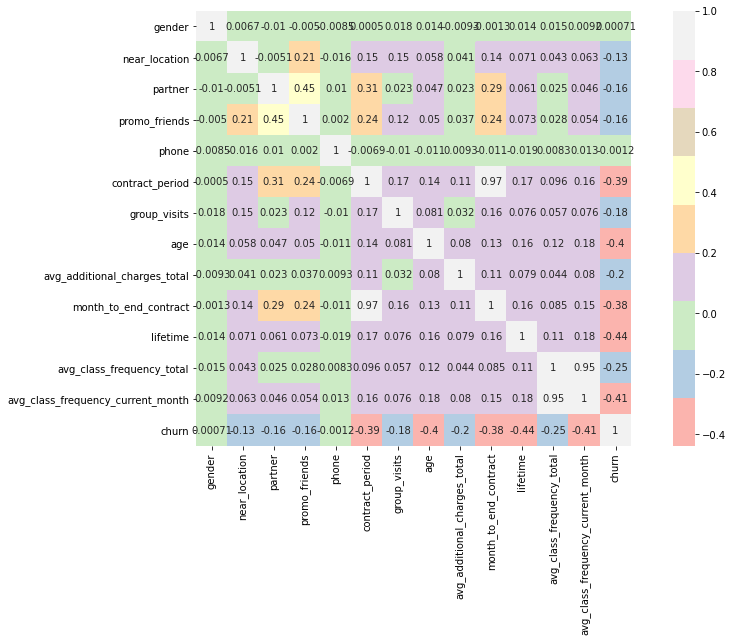

In [9]:
cm = df.corr() #вычисляем матрицу корреляций


fig, ax = plt.subplots(figsize=(15, 8))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, cmap='Pastel1')

plt.show()

Сильно коррелируют: 'avg_class_frequency_current_month' и 'avg_class_frequency_current_total', 'month_to_end_contract' и 'contract_period'. Чтобы избавиться от мультиколлинеарности, удалим из датафрейма по одному из этих столбцов, а также столбцы 'phone' и 'gender', так как их корреляция с остальными признаками близка к 0.

In [10]:
df = df.drop('avg_class_frequency_current_month', axis=1)
df = df.drop('month_to_end_contract', axis=1) 
df = df.drop('phone', axis=1) 
df = df.drop('gender', axis=1) 

#### Вывод

Исследовательский анализ данных показал, что в группе риска клиенты, покупающие абонементы на короткий срок, в возрасте до 30 лет и не являющиеся сотрудниками компаний-партнеров. В свою очередь надежными представляются клиенты в возрасте 27-33 года, преобретающие абонементы на длительный срок и регулярно посещающие тренировки. Также скидка для сотрудников компаний-партнеров положительно сказывается на продолительности посещения, а участие в акции "приведи друга" не удерживает клиентов

### Прогнозирование оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
Разбьем данные на обучающую и валидационную выборку функцией train_test_split().
Обучим модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.
Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 

In [41]:
# разделим данные на признаки
X = df.drop('churn', axis=1) #набор значений признаков
y = df['churn'] #столбец с целевой переменной

# разделяем модель на обучающую и валидационную выборку в пропорции 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


In [42]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [43]:
# посмотрим, как соотносятся классы набора данных
print('Соотношение классов:\n', df['churn'].value_counts())

Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


#### LogisticRegression

In [44]:
model = LogisticRegression(solver='liblinear')

# обучение модели
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st) #предсказания
probabilities = model.predict_proba(X_test_st)[:, 1] #вероятность

In [45]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions))) #Доля правильных ответов
print('Precision: {:.2f}'.format(precision_score(y_test, predictions))) #Точность
print('Recall: {:.2f}'.format(recall_score(y_test, predictions))) #Полнота


Accuracy: 0.91
Precision: 0.82
Recall: 0.83


#### RandomForestClassifier

In [46]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train) # обучим модель случайного леса

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]


In [47]:
# выведем все метрики
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions))) #Доля правильных ответов
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions))) #Точность
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions))) #Полнота

Accuracy: 0.90
Precision: 0.84
Recall: 0.77


Модели показали практически одинаковые результаты. Для выбора одной модели рассмотрим показатель ROC AUC

In [48]:
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

	ROC_AUC: 0.88
	ROC_AUC: 0.86


#### Вывод 

Учитывая более высокие показатели Recall и ROC AUC целесобразно использовать модель LogisticRegression. Основные признаки, наиболее сильно влияющие на отток:

In [49]:
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': model.coef_[0]}
).sort_values(
    by='importance'
).style.format(
    {'importance': '{:.2f}'}
)
fi_df

,feature,importance
7,lifetime,-3.51
3,contract_period,-1.33
5,age,-1.13
8,avg_class_frequency_total,-0.69
6,avg_additional_charges_total,-0.54
4,group_visits,-0.35
2,promo_friends,-0.17
0,near_location,-0.07
1,partner,-0.04


По важности признаков можно сделать вывод, что, чем дольше клиент посещает фитнес центр, тем меньше вероятность того, что он попадет в отток. Также покупка абонемента с длительным сроком клиентом среднего возраста увеличивает вероятность того, что он останется в клубе надолго.

### Кластеризация клиентов

Для сегментации клиенов построим дендрограмму

In [50]:
#стандартизация данных перед работой с алгоритмами
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward') #таблица «связок» между объектами

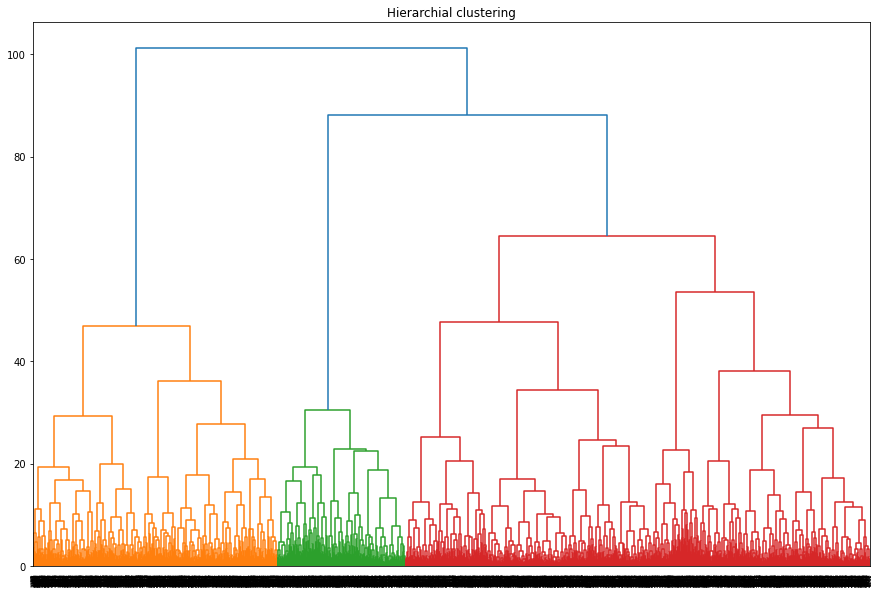

In [51]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

На уровне центра графика находятся 5 линий, разделим клиентов на 5 кластеров

In [52]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [53]:
X['cluster_km'] = labels #добавляем столбец с кластером

# выводим статистику по средним значениям наших признаков по кластеру
X.groupby('cluster_km').mean()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
cluster_km,,,,,,,,,
0,1.000000,0.246776,0.058469,2.950129,0.000000,28.584695,140.112487,2.444540,1.764249
1,0.996113,0.960155,0.941691,7.448980,0.479106,29.574344,154.498117,3.634597,1.931320
2,1.000000,0.244014,0.084379,4.461802,1.000000,29.458381,146.463808,2.850627,1.920231
3,0.000000,0.490000,0.071667,2.945000,0.228333,28.681667,136.832314,2.783333,1.765080
4,0.954683,0.495468,0.241692,5.888218,0.429003,30.262840,167.061566,12.525680,2.217033


По средним значениям можно сделать вывод:
- 0 кластер - клиенты, не посещающие групповые тренировки
- 1 кластер - участвовавшие в акции и являющиеся сотрудниками компании-партнера
- 2 кластер - клиенты, посещающие групповые тренировки 
- 3 кластер - это клиенты, не проживающие и не работающие в районе фитнес-центра
- в 4 кластере в основном клиенты, посещающие клуб в течение года

Построим распределения признаков для кластеров

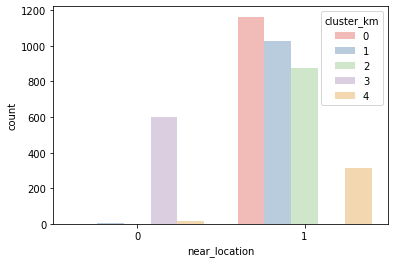

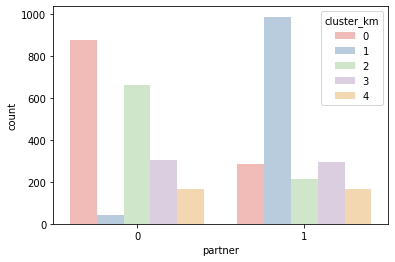

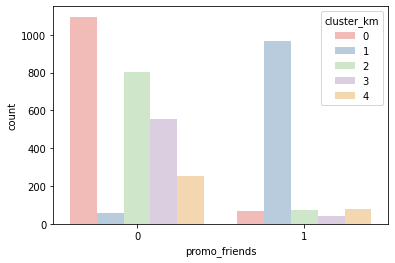

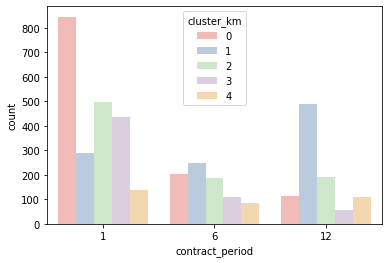

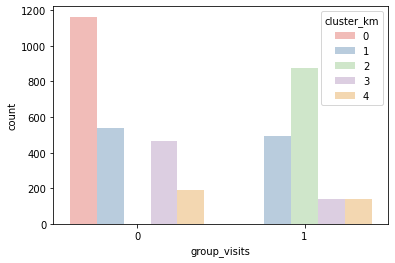

In [55]:
for i in X.columns[:-5]:
    sns.countplot(data = X, x = i, hue = 'cluster_km', palette='Pastel1')
    plt.show()

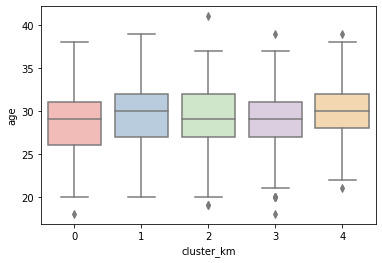

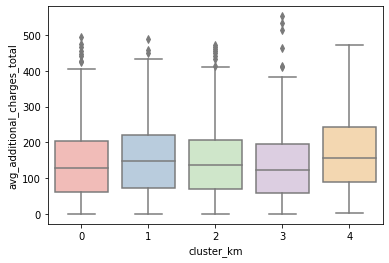

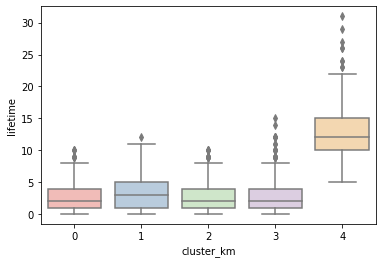

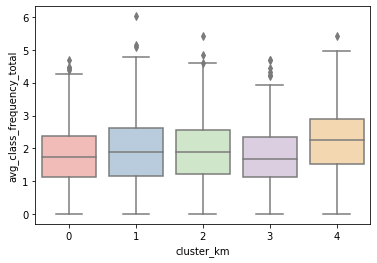

In [56]:
for i in X.columns[5:-1]:
    sns.boxplot(x ='cluster_km',y = i, data = X, palette='Pastel1')
    plt.show()

Исследуя полученные графики можно добавить, что к 0 кластеру относятся клиенты, в основном преобретавшие абонемент сроком на 1 месяц, к 4 кластеру - клиенты в возрасте 27-33 лет, которые посещают центр в течение длительного периода, клиенты 3 кластера посещают тренировки 1-2 раза в неделю.
- 0 кластер - клиенты, не посещающие групповые тренировки, преобретавшие абонемент, в основном, длительностью 1 месяц, не участники акции и редко сотрудники компаний-партнеров
- 1 кластер - участники акции и сотрудники компании-партнера, проживающие в районе фитнес-центра
- 2 кластер - клиенты, посещающие только групповые тренировки, не участвовавшие в акции
- 3 кластер - это клиенты, не проживающие и не работающие в районе фитнес-центра, не участники акции
- в 4 кластере в основном клиенты, посещающие клуб в течение года. Преобретают абонементы на разные сроки, регулярно посещают разные виды тренировок

Посчитаем долю оттока для каждого кластера и выясним какие из них склонны к оттоку

In [57]:
df['cluster_km'] = labels #добавляем столбец с кластером

# Для каждого полученного кластера посчитаем долю оттока
df.groupby('cluster_km').agg({'churn': 'mean'}).sort_values(by='churn', ascending=False).style.format({'churn': '{:.0%}'})

,churn
cluster_km,
0,41%
3,41%
2,22%
1,13%
4,0%


#### Вывод

Кластеризация клиентов показала, что большая доля оттока у клиентов, относящихся к 0 и 3 кластеру, а значит, необходимо разработать стратегию по удержанию клиентов этих кластеров. Клиенты 0 кластера проживают и работают в отдаленном районе, поэтому в половине случаев - это сотрудники компании-партнера, которых привлекла скидка на абонемент. Клиенты 3 кластера не участвовали в акции "приведи друга" и в 75% случаев покупали абонемент по полной стоимости, также для них характерно посещение исключительно тренажерного зала.

### Вывод

Проведенный анализ показал, что основная часть посетителей проживает или работает в том же районе, где находится фитнес-центр. Средний возраст клиентов - 29 лет. Клиенты, продолжающие посещение характеризуются покупкой абонементов на длительный срок и  регулярным посещением 2-3 раза в неделю. Клиенты, ушедшие в отток, в основном в возрасте ниже среднего, преобретавшие абонементы на короткий срок, нерегулярно посещавшие тренировки.

Для снижения оттока следует расмотреть возможность:
1) увеличения средней продолжительности преобретаемых абонементов в виде скидки или кэшбека в случае преобретения долгосрочных абонементов. После окончания абонемента на 1 месяц клиент может засомневаться в преобретении следующего.

2) увеличения среднего количества посещений в неделю, а также поощерение посещений разнообразных тренировок (как тренажерного зала, так и групповых тренировок) в виде кэшбека, который можно использовать в баре или при преобретении следующего абонемента. При регулярных разнообразных тренировках больше вероятность положительного результата
для клиента, что увеличивает вероятность того, что он останется в клубе надолго

3) предоставления дополнительных скидок или новых акций для молодежи и людей, проживающих в отдаленных районах